In [2]:
#import de librerias a utilizar 
!pip install pyodbc pandas matplotlib


  Using cached pyodbc-5.2.0-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.2.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
Using cached pyodbc-5.2.0-cp313-cp313-win_amd64.whl (69 kB)
Using cached pandas-2.2.3-cp313-cp313-win_amd64.whl (11.5 MB)
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 6.5 MB/s eta 0:00:02
   ------------- -------------------------- 2.6/7.8 MB 7.7 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.8 MB 8.0 MB/s eta 0:00:01
   ------------------------------ --------- 6.0/7.8 MB 7.6 MB/s eta 0:00:01
   ------------------------------------- -- 7.3/7.8 MB 7.4 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 7.2 MB/s eta 0:00:00
   ----

In [3]:
#Recuperación de datos desde SQL Server 
import pyodbc
import pandas as pd

# Configuración global de la conexión
server = 'localhost\\SQLEXPRESS'  # Cambia si usas otra instancia
database = 'AnalisisFallecidos'  # Reemplaza con tu base de datos
username = 'sa'  # Usuario de SQL Server
password = 'diegoarmira123'  # Contraseña del usuario

# Conexión
conn = pyodbc.connect(
    f"DRIVER={{ODBC Driver 17 for SQL Server}};"
    f"SERVER={server};"
    f"DATABASE={database};"
    f"UID={username};"
    f"PWD={password}"
)

# Consulta SQL para obtener los datos
query = """
SELECT departamento, municipio 
FROM [AnalisisFallecidos].[dbo].[CentralTable];
"""

# Leer los datos
data = pd.read_sql(query, conn)

# Mostrar los primeros registros para verificar
print(data.head())


C:\Users\diego\AppData\Local\Temp\ipykernel_4760\3800792054.py:27: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query, conn)


  departamento municipio
0          N/A       N/A
1          N/A       N/A
2          N/A       N/A
3          N/A       N/A
4          N/A       N/A


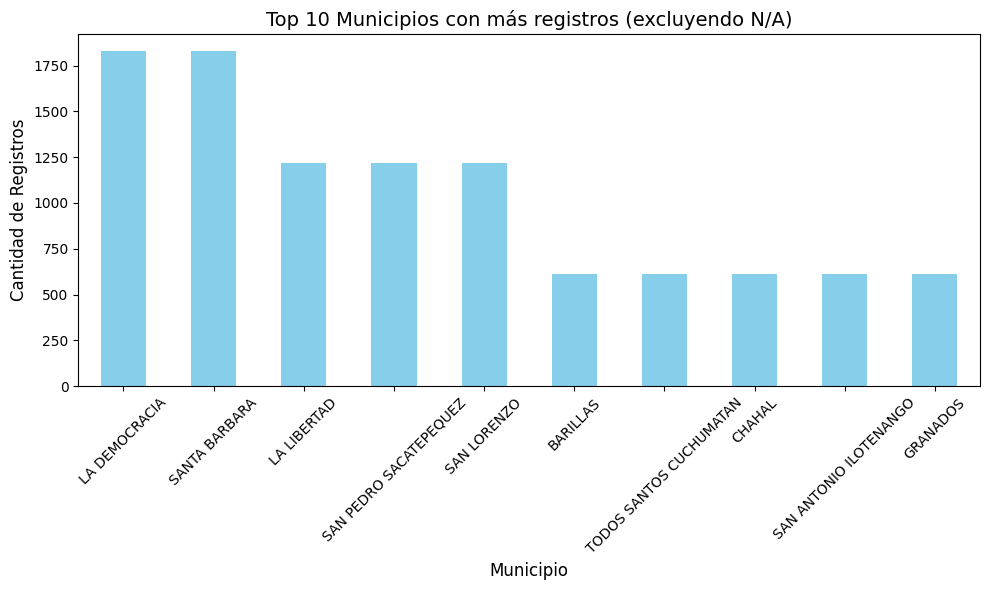

In [10]:
# Filtrar valores N/A en los municipios
filtered_data = data[data['municipio'].notna()]  # Excluir registros con NaN
filtered_data = filtered_data[filtered_data['municipio'] != 'N/A']  # Excluir registros con 'N/A'

# Conteo de registros por municipio después del filtrado
municipios_count = filtered_data['municipio'].value_counts()

# Obtener los 10 municipios con más registros
top_municipios = municipios_count.head(10)

# Histograma para los 10 municipios principales
plt.figure(figsize=(10, 6))  # Ajustar el tamaño del gráfico
top_municipios.plot(kind='bar', color='skyblue')
plt.title('Top 10 Municipios con más registros (excluyendo N/A)', fontsize=14)
plt.xlabel('Municipio', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotar las etiquetas
plt.tight_layout()  # Ajustar el diseño
plt.show()


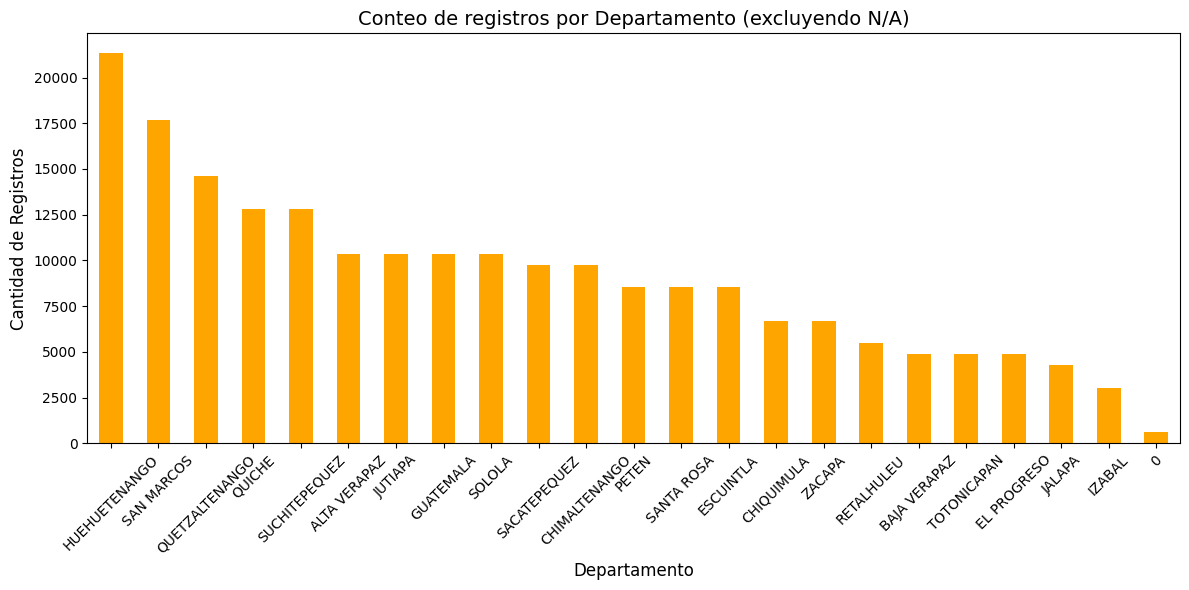

In [11]:
# Filtrar valores N/A en los departamentos
filtered_departments = data[data['departamento'].notna()]  # Excluir registros con NaN en departamentos
filtered_departments = filtered_departments[filtered_departments['departamento'] != 'N/A']  # Excluir 'N/A'

# Conteo de registros por departamento
departamentos_count = filtered_departments['departamento'].value_counts()

# Histograma
plt.figure(figsize=(12, 6))
departamentos_count.plot(kind='bar', color='orange')
plt.title('Conteo de registros por Departamento (excluyendo N/A)', fontsize=14)
plt.xlabel('Departamento', fontsize=12)
plt.ylabel('Cantidad de Registros', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()


## Comparativo: Análisis Exploratorio vs. Análisis Descriptivo

| **Análisis Exploratorio**                                                                 | **Análisis Descriptivo**                                                        |
|-------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------|
| **Departamentos**                                                                         | **Medidas por Departamento**                                                   |
| - Identificamos que Huehuetenango y San Marcos tienen los registros más altos de fallecidos. | - Huehuetenango lidera con más de 20,000 registros de fallecidos, seguido de San Marcos con aproximadamente 18,000. |
| - Se encontraron valores `N/A` en los datos, los cuales se eliminaron para obtener resultados más claros. | - Los departamentos con menos fallecidos incluyen Izabal y Jalapa, ambos con menos de 500 registros. |
| - Usamos histogramas para observar la distribución de los datos por departamentos y municipios. | - Existe una gran disparidad en los datos: los departamentos con mayor cantidad de fallecidos superan ampliamente a los demás. |
| **Municipios**                                                                           | **Medidas por Municipio**                                                      |
| - Municipios como La Democracia y Santa Bárbara destacan en el Top 10 de registros.       | - La Democracia y Santa Bárbara tienen más de 1,700 registros cada uno, liderando el Top 10. |
| - Identificamos municipios con conteos bajos y valores vacíos.                           | - Municipios como Granados tienen significativamente menos registros, mostrando una distribución desigual entre municipios. |
